# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [2]:
df = pd.read_csv("supermarket_sales.csv")
df.head()

,Order_ID,Order_Date,Region,Country,Sales_Rep,Team,Customer_ID,Customer_Segment,Product_Category,Product_Name,Stage,Units_Sold,Revenue,Target,Deal_Size
0,4971,2021-01-01,North,USA,David Lee,Team C,C3971,Corporate,Furniture,Office Chair,Won,6,1662,1447,1665
1,2347,2021-01-02,South,Brazil,Alice Johnson,Team B,C1347,SME,Appliances,Microwave Max,Opportunity,2,464,875,928
2,2588,2021-01-02,South,Brazil,Maria Garcia,Team C,C1588,Retail,Appliances,Refrigerator,Opportunity,5,132,277,264
3,5092,2021-01-02,East,China,Priya Sharma,Team B,C4092,Retail,Appliances,Microwave Max,Opportunity,5,610,1080,1220
4,1182,2021-01-02,North,Canada,David Lee,Team A,C0182,Retail,Electronics,Smartphone Z,Lost,0,0,854,0


In [3]:
df.tail()

,Order_ID,Order_Date,Region,Country,Sales_Rep,Team,Customer_ID,Customer_Segment,Product_Category,Product_Name,Stage,Units_Sold,Revenue,Target,Deal_Size
4995,1617,2024-12-29,West,Germany,Alice Johnson,Team B,C0617,Retail,Furniture,Standing Desk,Opportunity,1,489,724,979
4996,2016,2024-12-30,North,Canada,Priya Sharma,Team A,C1016,Corporate,Furniture,Standing Desk,Opportunity,1,203,486,407
4997,1903,2024-12-30,West,Germany,David Lee,Team B,C0903,Corporate,Furniture,Standing Desk,Lost,0,0,1424,0
4998,2127,2024-12-30,West,Germany,David Lee,Team A,C1127,SME,Electronics,Smartphone Z,Won,10,1170,1044,1172
4999,4221,2024-12-30,South,Brazil,Wei Zhang,Team C,C3221,Corporate,Furniture,Standing Desk,Lost,0,0,1876,0


# Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order_ID          5000 non-null   int64 
 1   Order_Date        5000 non-null   object
 2   Region            5000 non-null   object
 3   Country           5000 non-null   object
 4   Sales_Rep         5000 non-null   object
 5   Team              5000 non-null   object
 6   Customer_ID       5000 non-null   object
 7   Customer_Segment  5000 non-null   object
 8   Product_Category  5000 non-null   object
 9   Product_Name      5000 non-null   object
 10  Stage             5000 non-null   object
 11  Units_Sold        5000 non-null   int64 
 12  Revenue           5000 non-null   int64 
 13  Target            5000 non-null   int64 
 14  Deal_Size         5000 non-null   int64 
dtypes: int64(5), object(10)
memory usage: 586.1+ KB


In [5]:
df.shape

(5000, 15)

In [6]:
df.isnull().sum()

Order_ID            0
Order_Date          0
Region              0
Country             0
Sales_Rep           0
Team                0
Customer_ID         0
Customer_Segment    0
Product_Category    0
Product_Name        0
Stage               0
Units_Sold          0
Revenue             0
Target              0
Deal_Size           0
dtype: int64

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.dtypes

Order_ID             int64
Order_Date          object
Region              object
Country             object
Sales_Rep           object
Team                object
Customer_ID         object
Customer_Segment    object
Product_Category    object
Product_Name        object
Stage               object
Units_Sold           int64
Revenue              int64
Target               int64
Deal_Size            int64
dtype: object

In [9]:
df.describe()

,Order_ID,Units_Sold,Revenue,Target,Deal_Size
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,3500.500000,2.818400,502.390000,994.572000,639.007800
std,1443.520003,2.922453,555.072392,556.665335,598.863616
min,1001.000000,0.000000,0.000000,-193.000000,0.000000
25%,2250.750000,0.000000,0.000000,567.000000,0.000000
50%,3500.500000,2.000000,347.500000,914.000000,556.000000
75%,4750.250000,5.000000,728.000000,1427.000000,1129.000000
max,6000.000000,10.000000,1999.000000,2461.000000,1999.000000


In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.columns

Index(['Order_ID', 'Order_Date', 'Region', 'Country', 'Sales_Rep', 'Team',
       'Customer_ID', 'Customer_Segment', 'Product_Category', 'Product_Name',
       'Stage', 'Units_Sold', 'Revenue', 'Target', 'Deal_Size'],
      dtype='object')

# Data Visualization

In [12]:
plt.style.use('seaborn-v0_8-whitegrid')

In [13]:
df['Order_Date']=pd.to_datetime(df['Order_Date'], errors='coerce')

Top Selling Products by Revenue

We grouped the dataset by Product_Name to calculate the total revenue generated by each product. Then, we sorted the results in descending order and selected the top 10 products. The bar chart shows which products earned the highest revenue, helping us quickly identify the best-performing products in terms of sales.

C:\Users\Hp\AppData\Local\Temp\ipykernel_15852\2656667705.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.index, y=top_products.values, palette="viridis")


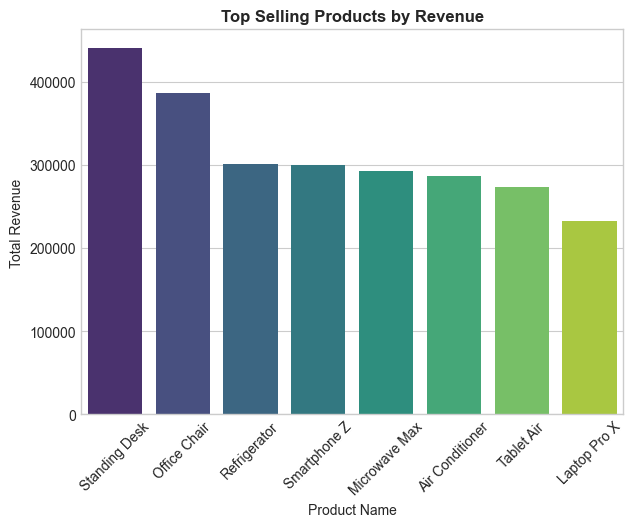

In [14]:
top_products = df.groupby('Product_Name')['Revenue'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(7,5))
sns.barplot(x=top_products.index, y=top_products.values, palette="viridis")
plt.title("Top Selling Products by Revenue", weight='bold')
plt.ylabel("Total Revenue")
plt.xlabel("Product Name")
plt.xticks(rotation=45)
plt.show()

Top Countries by Sales Revenue:

We grouped the data by Country and calculated the total revenue generated from each region. After sorting the values in descending order, we selected the top 10 highest-revenue countries. The bar chart shows which countries contribute the most to overall sales, allowing us to identify our strongest markets and regions with the highest business activity.

C:\Users\Hp\AppData\Local\Temp\ipykernel_15852\3112333309.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_regions.index, y=top_regions.values, palette="Set2")


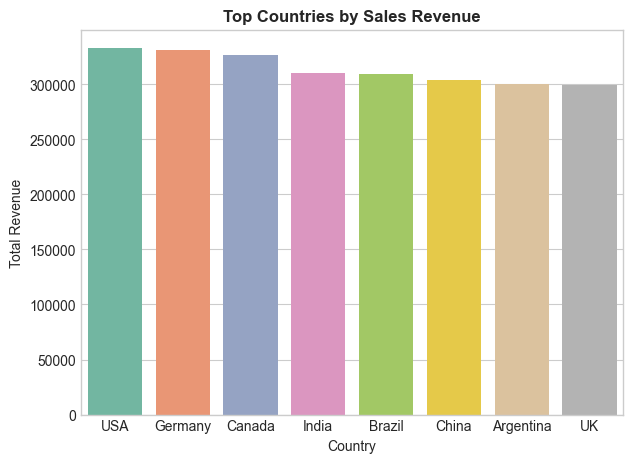

In [15]:
top_regions = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(7,5))
sns.barplot(x=top_regions.index, y=top_regions.values, palette="Set2")
plt.title("Top Countries by Sales Revenue", weight='bold')
plt.ylabel("Total Revenue")
plt.xlabel("Country")
plt.show()

Revenue by Customer Segment:

We grouped the data by Customer_Segment and calculated the total revenue generated from each segment. The results show which customer groups contribute the most to overall sales. The bar chart provides a clear comparison of revenue performance across different customer segments, helping identify the most valuable customer groups for the business.

C:\Users\Hp\AppData\Local\Temp\ipykernel_15852\902122394.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment_sales.index, y=segment_sales.values, palette="viridis")


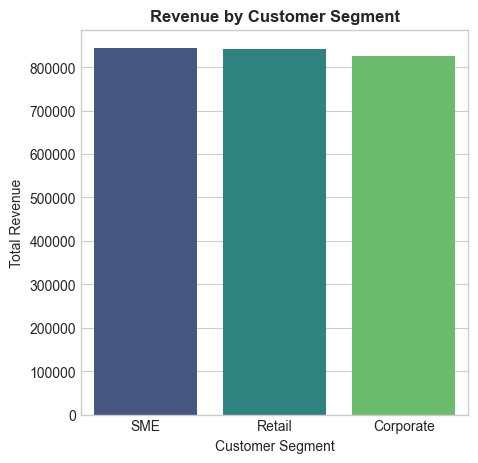

In [16]:
segment_sales = df.groupby('Customer_Segment')['Revenue'].sum().sort_values(ascending=False)

plt.figure(figsize=(5,5))
sns.barplot(x=segment_sales.index, y=segment_sales.values, palette="viridis")
plt.title("Revenue by Customer Segment", weight='bold')
plt.xlabel("Customer Segment")
plt.ylabel("Total Revenue")
plt.show()

Total Revenue by Product Category:

We grouped the data by Product_Category and calculated the total revenue for each category. The bar chart shows which categories bring in the highest revenue, helping us understand which types of products are most profitable and contribute the most to overall sales.

C:\Users\Hp\AppData\Local\Temp\ipykernel_15852\963116353.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_rev.index, y=category_rev.values, palette="magma")


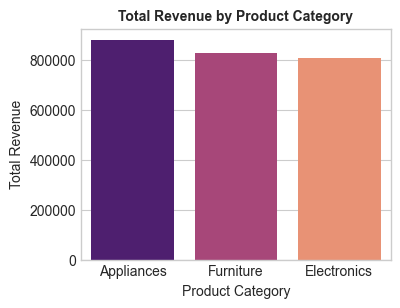

In [17]:
plt.figure(figsize=(4,3))
category_rev = df.groupby('Product_Category')['Revenue'].sum().sort_values(ascending=False)
sns.barplot(x=category_rev.index, y=category_rev.values, palette="magma")
plt.title("Total Revenue by Product Category", fontsize=10, weight='bold')
plt.xlabel("Product Category")
plt.ylabel("Total Revenue")
plt.show()

Revenue by Region:

We grouped the data by Region and calculated the total revenue generated in each area. The bar chart shows which regions contribute the most to overall sales, helping identify strong markets and regions where performance may be improved.

C:\Users\Hp\AppData\Local\Temp\ipykernel_15852\1861190425.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_rev.index, y=region_rev.values, palette="coolwarm")


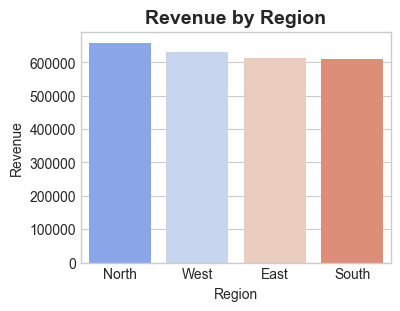

In [18]:
plt.figure(figsize=(4,3))
region_rev = df.groupby('Region')['Revenue'].sum().sort_values(ascending=False)
sns.barplot(x=region_rev.index, y=region_rev.values, palette="coolwarm")
plt.title("Revenue by Region", fontsize=14, weight='bold')
plt.xlabel("Region")
plt.ylabel("Revenue")
plt.show()

Top Sales Representatives by Revenue:

We grouped the data by Sales_Rep and calculated the total revenue each representative generated. After sorting the values in descending order, we selected the top 12 sales reps. The bar chart highlights which representatives contributed the most to overall sales, helping identify high performers and potential areas for team improvement.

C:\Users\Hp\AppData\Local\Temp\ipykernel_15852\1761443160.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rep_rev.index, y=rep_rev.values, palette="viridis")


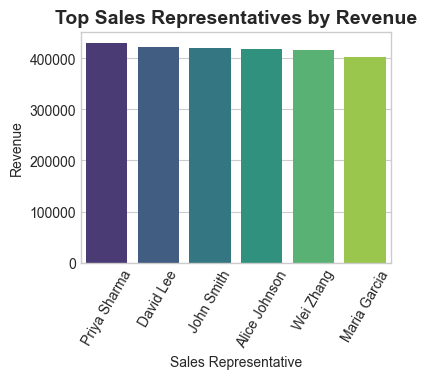

In [19]:
plt.figure(figsize=(4,3))
rep_rev = df.groupby('Sales_Rep')['Revenue'].sum().sort_values(ascending=False).head(12)
sns.barplot(x=rep_rev.index, y=rep_rev.values, palette="viridis")
plt.title("Top Sales Representatives by Revenue", fontsize=14, weight='bold')
plt.xlabel("Sales Representative")
plt.ylabel("Revenue")
plt.xticks(rotation=60)
plt.show()

Monthly Revenue Trend:

We extracted the Month from the order dates and calculated the total revenue for each month. The line chart shows how revenue changes over time, helping us identify sales patterns, seasonal trends, and any growth or decline in monthly performance.

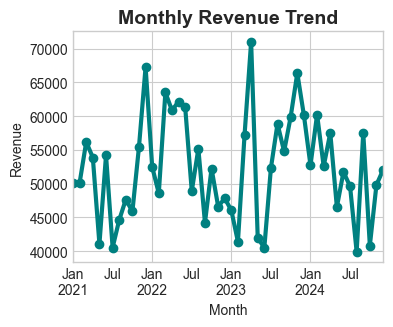

In [20]:
df['Month'] = df['Order_Date'].dt.to_period('M')
monthly_trend = df.groupby('Month')['Revenue'].sum()

plt.figure(figsize=(4,3))
monthly_trend.plot(kind='line', linewidth=3, marker='o', color='teal')
plt.title("Monthly Revenue Trend", fontsize=14, weight='bold')
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()

Distribution of Numerical Variables:

We selected key numerical columns (Units_Sold, Revenue, Target, and Deal_Size) and plotted their distributions using histograms with density curves. This helps us understand how each variable is spread across the dataset, identify common value ranges, and detect any skewness or outliers in the data.

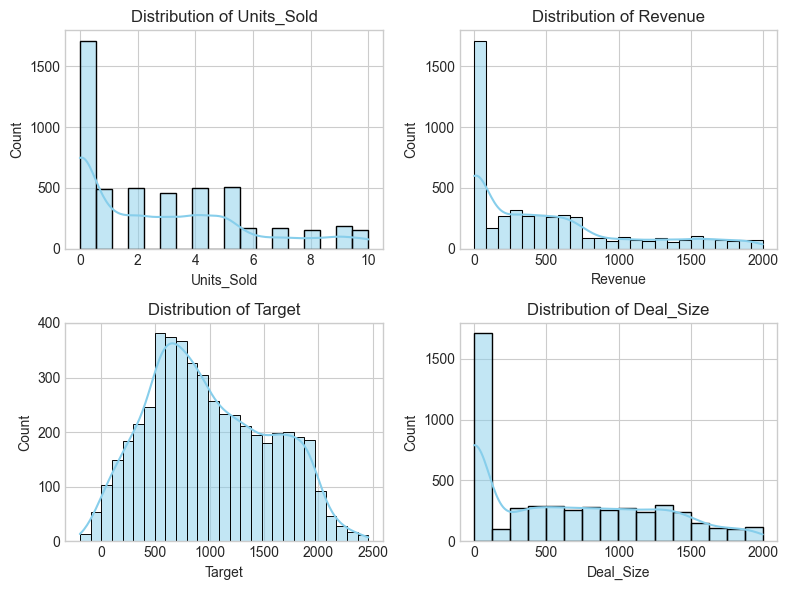

In [21]:
num_cols = ['Units_Sold', 'Revenue', 'Target', 'Deal_Size']

plt.figure(figsize=(8,6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

Outlier Detection Using Boxplots:

We plotted boxplots for the numerical features (Units_Sold, Revenue, Target, and Deal_Size) to visually inspect the presence of outliers. Boxplots show the spread of data and highlight values that fall significantly outside the normal range. This helps identify unusual or extreme values that may need further investigation or preprocessing before analysis or modeling.

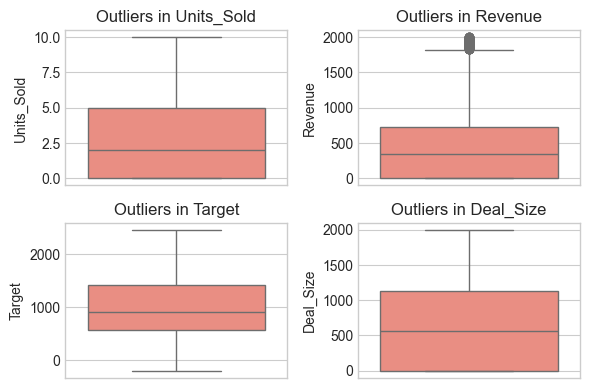

In [22]:
plt.figure(figsize=(6,4))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[col], color='salmon')
    plt.title(f"Outliers in {col}")
plt.tight_layout()
plt.show()

Correlation Heatmap:

We calculated the correlation between the numerical variables and visualized it using a heatmap. The heatmap shows how strongly each pair of variables is related. Higher correlation values indicate a stronger relationship. This helps us understand patterns in the data, such as which factors tend to increase or decrease together, and can guide feature selection for modeling.

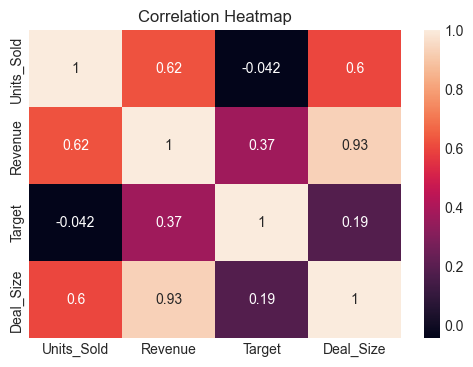

In [23]:
plt.figure(figsize=(6,4))
sns.heatmap(df[num_cols].corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()

Units Sold vs Revenue:

This scatter plot shows the relationship between Units_Sold and Revenue. Each point represents a transaction or record. The upward trend indicates that as more units are sold, the revenue generally increases, showing a positive relationship between these two variables.

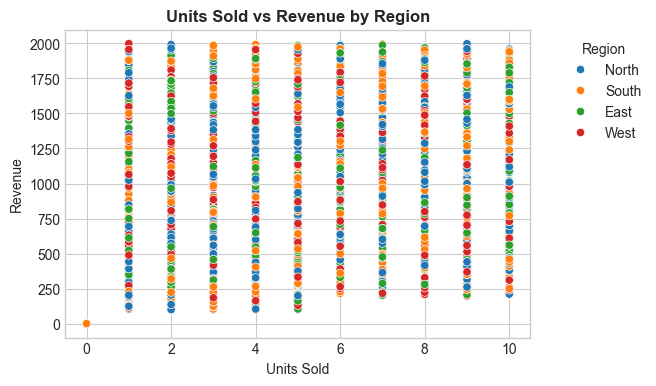

In [31]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Units_Sold', y='Revenue', data=df, hue='Region')
plt.title("Units Sold vs Revenue by Region", weight='bold')
plt.xlabel("Units Sold")
plt.ylabel("Revenue")
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Deal Size vs Revenue:

The scatter plot displays the relationship between Deal_Size and Revenue. Each point represents a sale. A positive pattern indicates that larger deal sizes generally result in higher revenue, helping us understand how deal scale impacts overall sales performance.

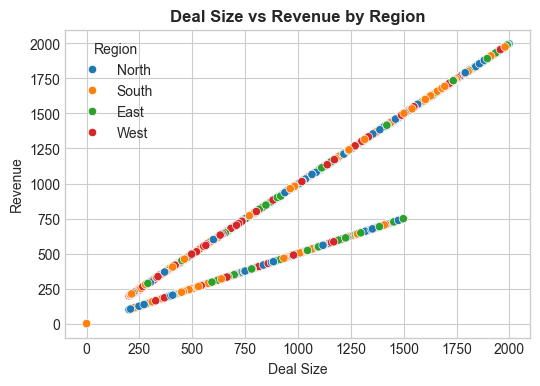

In [29]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Deal_Size', y='Revenue', data=df, hue='Region')
plt.title("Deal Size vs Revenue by Region", weight='bold')
plt.xlabel("Deal Size")
plt.ylabel("Revenue")
plt.legend(title='Region')
plt.show()

Target vs Revenue:

This scatter plot shows the relationship between Target and Revenue. Each point represents a record from the dataset. The visualization helps us see whether higher sales targets are associated with higher revenue, and observe any patterns or deviations between expected targets and actual sales performance.

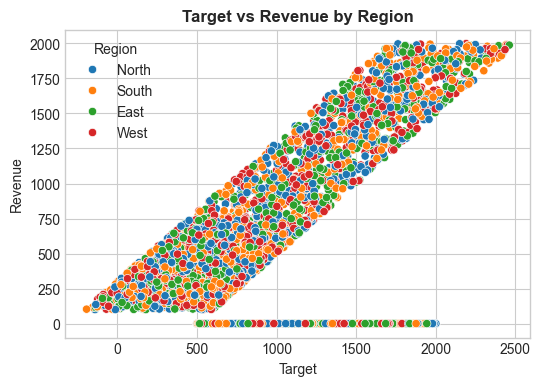

In [27]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Target', y='Revenue', data=df, hue='Region')
plt.title("Target vs Revenue by Region", weight='bold')
plt.xlabel("Target")
plt.ylabel("Revenue")
plt.legend(title='Region')
plt.show()